<a href="https://colab.research.google.com/github/Ajayyyyy45/Freshness-Finder/blob/main/FreshnessFinder1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/fruits-360_100x100.zip"
extract_to = "/content/fruits_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)



In [ ]:
import os
os.listdir(extract_to)

['fruits-360']

In [ ]:
import os

# List top-level folders
print("Top level:", os.listdir("/content/fruits_data"))

# If there's only one folder inside (like 'fruits-360'), go one level deeper
subfolder_path = "/content/fruits_data/" + os.listdir("/content/fruits_data")[0]
print("Inside main folder:", os.listdir(subfolder_path))


Top level: ['fruits-360']
Inside main folder: ['LICENSE', 'README.md', 'Training', 'Test']


In [ ]:
real_path = "/content/fruits_data/fruits-360/Training/Apple Red 1"
# This is just an example. Adjust based on what you see from the listing.

In [ ]:
# Search for an image file named 0_100.jpg
for root, dirs, files in os.walk("/content/fruits_data"):
    for name in files:
        if name == "0_100.jpg":
            print(os.path.join(root, name))


/content/fruits_data/fruits-360/Training/Pomegranate 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Walnut 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Rambutan 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Avocado 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Banana 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Salak 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Blueberry 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Carambula 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Pomelo Sweetie 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Guava 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Corn 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Plum 3/0_100.jpg
/content/fruits_data/fruits-360/Training/Potato Red 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Cactus fruit 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Plum 1/0_100.jpg
/content/fruits_data/fruits-360/Training/Beetroot 1/0_100.jpg
/content/fruit

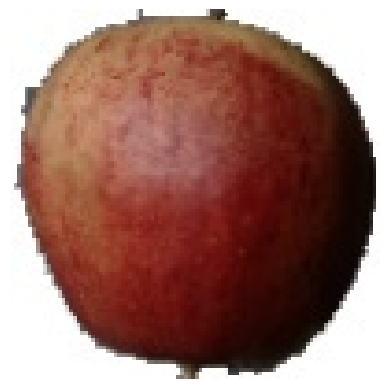

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/fruits_data/fruits-360/Training/Apple Red 3/0_100.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()


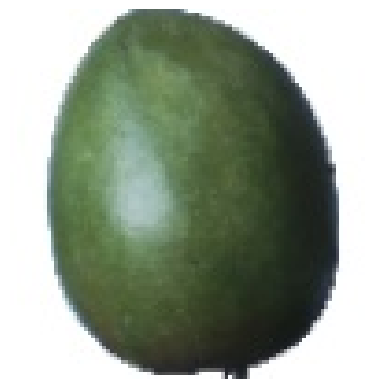

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/fruits_data/fruits-360/Test/Mango 1/0_100.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

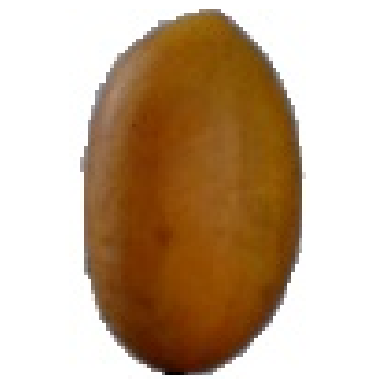

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/fruits_data/fruits-360/Training/Cucumber Ripe 2/0_100.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
!pip install gradio

import gradio as gr
from PIL import Image
import numpy as np

def classify_image(img):
    img = img.resize((100, 100))  # Resize to match your model input
    img = np.expand_dims(np.array(img) / 255.0, axis=0)
    prediction = model.predict(img)
    label = class_names[np.argmax(prediction)]
    return label

gr.Interface(fn=classify_image, inputs=gr.Image(), outputs="text").launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.0 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6b454f3d1dbd692271.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory 

In [ ]:
gr.Interface(
    fn=classify_image,
    inputs=gr.Image(label="Upload a fruit image"),
    outputs=gr.Label(num_top_classes=3),
    title="Fruit Classifier 🍎🍌🍇",
    description="Upload a fruit image and get the predicted type.",
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fcba3b1e2300247e05.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
def classify_image(img):
    img = img.resize((100, 100))  # Model input size
    img = np.expand_dims(np.array(img) / 255.0, axis=0)
    prediction = model.predict(img)
    label = class_names[np.argmax(prediction)]
    return label


In [ ]:
class_names = ['Apple Red 1', 'Banana', 'Pineapple', ...]  # match your dataset


In [ ]:
gr.Interface(
    fn=classify_image,
    inputs=gr.Image(label="Upload a fruit image"),
    outputs=gr.Label(num_top_classes=3),
    title="Fruit Classifier 🍎🍌🍇",
    description="Upload a fruit image and get the predicted type.",
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://caad5e56debbb3fd29.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths (update if different)
train_dir = "/content/fruits_data/fruits-360/Training"
test_dir = "/content/fruits_data/fruits-360/Test"

# Image generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and testing data
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_gen, epochs=5, validation_data=test_gen)

# Save the model
model.save("/content/fruit_classifier_model.h5")

print("✅ Model trained and saved as 'fruit_classifier_model.h5'")


Found 92545 images belonging to 180 classes.
Found 30846 images belonging to 179 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
  43/2893 ━━━━━━━━━━━━━━━━━━━━ 25:03 527ms/step - accuracy: 0.0089 - loss: 5.1879

KeyboardInterrupt: 

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/fruits-360_100x100.zip"
extract_path = "/content/fruits_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset unzipped!")


✅ Dataset unzipped!


In [ ]:
import os

for root, dirs, files in os.walk("/content/fruits_data"):
    print("Folders inside:", dirs)
    break  # Only print top level

Folders inside: ['fruits-360']


In [ ]:
['fruits-360_dataset']

['fruits-360_dataset']

In [ ]:
for root, dirs, files in os.walk("/content/fruits_data/fruits-360_dataset"):
    print("Subfolders:", dirs)
    break

In [ ]:
train_dir = "/content/fruits_data/fruits-360/Training"
test_dir = "/content/fruits_data/fruits-360/Test"

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_gen, epochs=5, validation_data=test_gen)

# Save model
model.save("/content/fruit_classifier_model.h5")
print("✅ Model trained and saved!")


Found 92545 images belonging to 180 classes.
Found 30846 images belonging to 179 classes.
Epoch 1/5
  28/2893 ━━━━━━━━━━━━━━━━━━━━ 25:40 538ms/step - accuracy: 0.0120 - loss: 5.2001

KeyboardInterrupt: 

In [ ]:
# Step 1: Get class names from training set
class_names = sorted(os.listdir(train_dir))

# Step 2: Pass classes explicitly to both generators
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    classes=class_names
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    classes=class_names
)


Found 92545 images belonging to 180 classes.
Found 30846 images belonging to 180 classes.


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_gen, epochs=1, validation_data=test_gen)

# Save the trained model
model.save("/content/drive/MyDrive/fruit_classifier_model.h5")

print("✅ Training complete and model saved!")


2893/2893 ━━━━━━━━━━━━━━━━━━━━ 1979s 683ms/step - accuracy: 0.7199 - loss: 1.1960 - val_accuracy: 0.9388 - val_loss: 0.2505


✅ Training complete and model saved!


In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load the saved model
model = load_model("/content/drive/MyDrive/fruit_classifier_model.h5")

# Use the same class names you used in training
class_names = sorted(os.listdir("/content/fruits_data/fruits-360/Training"))

# Prediction function
def classify_fruit(img):
    img = img.resize((100, 100))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    index = np.argmax(prediction[0])
    label = class_names[index]
    confidence = prediction[0][index]

    return f"{label} ({confidence:.2%} confidence)"

# Launch Gradio interface
gr.Interface(
    fn=classify_fruit,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="🍉 Freshness Finder",
    description="Upload an image of a fruit to see what it is!"
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://09a6d62c491ce518a1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
gr.Interface(
    fn=classify_fruit,
    inputs=gr.Image(type="pil", label="Upload Fruit Image"),
    outputs=gr.Textbox(label="Prediction"),
    title="🍉 Freshness Finder",
    description="Upload an image of a fruit to find out what it is!",
    theme="soft"
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://834b505b09679f4530.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!gradio deploy

Need 'write' access token to create a Spaces repo.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
╭───────────────────── Traceback (most recent call last) ──────────────────────╮
│ /usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_http.py:409   │
│ in hf_raise_for_status                                                       │
│                                                

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile

zip_path = "/content/drive/MyDrive/archive.zip"  # ✅ path as a string
extract_path = "/content/freshness_dataset"      # ✅ where to unzip

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipped successfully!")


✅ Unzipped successfully!


In [3]:
import os

for folder in os.listdir(extract_path):
    print(folder)

dataset


In [4]:
import os

extract_path = "/content/freshness_dataset"  # the same as you used earlier

for root, dirs, files in os.walk(extract_path):
    print("📂", root)
    for d in dirs:
        print("  └──", d)
    break  # just show the top level

📂 /content/freshness_dataset
  └── dataset


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path = "/content/freshness_dataset/dataset/train"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(train_data, validation_data=val_data, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 201s 726ms/step - accuracy: 0.5003 - loss: 1.3848 - val_accuracy: 0.8691 - val_loss: 0.4057
Epoch 2/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 179s 655ms/step - accuracy: 0.8153 - loss: 0.5208 - val_accuracy: 0.8783 - val_loss: 0.3296
Epoch 3/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 179s 655ms/step - accuracy: 0.8548 - loss: 0.4057 - val_accuracy: 0.9252 - val_loss: 0.2090
Epoch 4/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 199s 644ms/step - accuracy: 0.8811 - loss: 0.3297 - val_accuracy: 0.9270 - val_loss: 0.1878
Epoch 5/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 181s 665ms/step - accuracy: 0.8935 - loss: 0.2844 - val_accuracy: 0.9146 - val_loss: 0.2208


In [7]:
model2.save("freshness_model.h5")

In [8]:
model2.save("fruit_classifier_model.h5")

In [9]:
!ls -lh

total 100M
drwx------ 6 root root 4.0K Apr 29 02:44 drive
drwxr-xr-x 3 root root 4.0K Apr 29 02:45 freshness_dataset
-rw-r--r-- 1 root root  50M Apr 29 03:03 freshness_model.h5
-rw-r--r-- 1 root root  50M Apr 29 03:03 fruit_classifier_model.h5
drwxr-xr-x 1 root root 4.0K Apr 25 17:44 sample_data


In [10]:
from tensorflow.keras.models import load_model

model1 = load_model("/content/fruit_classifier_model.h5")
model2 = load_model("/content/freshness_model.h5")


In [15]:
from PIL import Image # Import the Image module from PIL

img = Image.open("/content/freshness_dataset/dataset/train/freshapples/Screen Shot 2018-06-08 at 4.59.36 PM.png").convert("RGB")



In [14]:
img = Image.open("/content/freshness_dataset/dataset/train/freshapples/Screen Shot 2018-06-08 at 4.59.36 PM.png").convert("RGB")


NameError: name 'Image' is not defined

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    '/content/freshness_dataset/dataset/train',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)





Found 8723 images belonging to 6 classes.


In [17]:
class_labels = ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


In [22]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.image import resize

In [23]:
model = load_model('fruit_classifier_model.h5')

In [24]:
img_array = img_to_array(img)

In [25]:
img_array = resize(img_array, (100, 100))

In [26]:
img_array = img_array / 255.0

In [27]:
img_array = np.expand_dims(img_array, axis=0)

In [28]:
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [29]:
predicted_class_index = np.argmax(predictions)
predicted_label = class_labels[predicted_class_index]
confidence = np.max(predictions) * 100

print(f"Predicted: {predicted_label} ({confidence:.2f}% confidence)")

Predicted: freshapples (99.58% confidence)


In [30]:
def classify_fruit(img):
    img_input = preprocess_image(img)
    predictions = model1.predict(img_input)
    class_idx = np.argmax(predictions)
    label = list(train_gen.class_indices.keys())[class_idx]
    confidence = np.max(predictions) * 100
    return f"{label} ({confidence:.2f}% confidence)"


In [32]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.5 MB/s eta 0:00:00


In [33]:
import gradio as gr

gr.Interface(fn=classify_fruit, inputs="image", outputs="text").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2fb518ce5df9a620ba.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [34]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)
        fruit_prediction = model1.predict(img_input)
        freshness_prediction = model2.predict(img_input)

        fruit_idx = np.argmax(fruit_prediction)
        freshness_idx = np.argmax(freshness_prediction)

        fruit_label = list(fruit_train_gen.class_indices.keys())[fruit_idx]
        freshness_label = list(freshness_train_gen.class_indices.keys())[freshness_idx]

        confidence = np.max(freshness_prediction) * 100

        return f"{fruit_label} - {freshness_label} ({confidence:.2f}% confidence)"

    except Exception as e:
        return f"Error: {str(e)}"


In [35]:
def preprocess_image(img):
    img = img.resize((100, 100))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [36]:
import gradio as gr

interface = gr.Interface(
    fn=classify_fruit,
    inputs=gr.Image(type="pil"),
    outputs="text"
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ee316d81b110e0e2a8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [37]:
from tensorflow.keras.models import load_model

model1 = load_model("/content/fruit_classifier_model.h5")
model2 = load_model("/content/freshness_model.h5")


In [38]:
from PIL import Image

test_img = Image.open("/content/freshness_dataset/dataset/test/rottenapples/Screen Shot 2018-06-07 at 2.15.34 PM.png")  # update path if needed
print(classify_fruit(test_img))

Error: Exception encountered when calling Sequential.call().

Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (1, 100, 100, 4)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 100, 100, 4), dtype=float32)
  • training=False
  • mask=None


In [39]:
import traceback

def classify_fruit(img):
    try:
        img_input = preprocess_image(img)
        fruit_prediction = model1.predict(img_input)
        freshness_prediction = model2.predict(img_input)

        fruit_idx = np.argmax(fruit_prediction)
        freshness_idx = np.argmax(freshness_prediction)

        fruit_label = list(fruit_train_gen.class_indices.keys())[fruit_idx]
        freshness_label = list(freshness_train_gen.class_indices.keys())[freshness_idx]

        confidence = np.max(freshness_prediction) * 100

        return f"{fruit_label} - {freshness_label} ({confidence:.2f}% confidence)"
    except Exception as e:
        print(traceback.format_exc())  # print error in backend (Colab)
        return f"Error: {str(e)}"


In [40]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Assuming you have loaded your models like so:
# model1 = tf.keras.models.load_model('path_to_fruit_model')
# model2 = tf.keras.models.load_model('path_to_freshness_model')

# Your class generators (this should match how you trained your models)
# fruit_train_gen = ...
# freshness_train_gen = ...

def preprocess_image(img):
    # Resize the image to the size that the models expect
    img = image.load_img(img, target_size=(224, 224))  # Adjust the target size as per your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize if your model was trained with this normalization
    return img_array

def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict fruit and freshness
        fruit_prediction = model1.predict(img_input)
        freshness_prediction = model2.predict(img_input)

        # Get the index with the highest prediction
        fruit_idx = np.argmax(fruit_prediction)
        freshness_idx = np.argmax(freshness_prediction)

        # Map indices to the labels using the class_indices from your data generators
        fruit_label = list(fruit_train_gen.class_indices.keys())[fruit_idx]
        freshness_label = list(freshness_train_gen.class_indices.keys())[freshness_idx]

        # Calculate confidence in freshness prediction
        confidence = np.max(freshness_prediction) * 100

        # Return only the text output
        return f"{fruit_label} - {freshness_label} ({confidence:.2f}% confidence)"
    except Exception as e:
        return f"Error: {str(e)}"

# Updated Gradio interface for uploading images
iface = gr.Interface(fn=classify_fruit, inputs=gr.Image(type="pil"), outputs="text")

# Launch the interface
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://598109450b9fed1747.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [41]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from io import BytesIO

# Assuming you have loaded your models like so:
# model1 = tf.keras.models.load_model('path_to_fruit_model')
# model2 = tf.keras.models.load_model('path_to_freshness_model')

# Your class generators (this should match how you trained your models)
# fruit_train_gen = ...
# freshness_train_gen = ...

def preprocess_image(img):
    # Resize the image to the size that the models expect
    img = img.resize((224, 224))  # Adjust the target size as per your model
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize if your model was trained with this normalization
    return img_array

def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict fruit and freshness
        fruit_prediction = model1.predict(img_input)
        freshness_prediction = model2.predict(img_input)

        # Get the index with the highest prediction
        fruit_idx = np.argmax(fruit_prediction)
        freshness_idx = np.argmax(freshness_prediction)

        # Map indices to the labels using the class_indices from your data generators
        fruit_label = list(fruit_train_gen.class_indices.keys())[fruit_idx]
        freshness_label = list(freshness_train_gen.class_indices.keys())[freshness_idx]

        # Calculate confidence in freshness prediction
        confidence = np.max(freshness_prediction) * 100

        # Return the text result
        return f"{fruit_label} - {freshness_label} ({confidence:.2f}% confidence)"
    except Exception as e:
        return f"Error: {str(e)}"

# Updated Gradio interface for uploading images
iface = gr.Interface(fn=classify_fruit, inputs=gr.Image(type="pil"), outputs="text")

# Launch the interface
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3034340ab4668e61ea.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [42]:
print(model1.input_shape)  # or model2.input_shape


(None, 100, 100, 3)


In [43]:
def preprocess_image(img):
    # Resize the image to the size that the models expect (e.g., 320x320)
    img = img.resize((320, 320))  # Update this size according to your model's input size
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize if your model was trained with this normalization
    return img_array


In [44]:
def preprocess_image(img):
    # Resize the image to the expected size (e.g., 320x320)
    img = img.resize((320, 320))  # Update this size according to your model's input size
    img_array = np.array(img)

    # Flatten the image if the model expects a 1D array
    img_array = img_array.flatten()

    # Reshape to (1, 12800) if required
    img_array = np.expand_dims(img_array, axis=0)

    img_array = img_array / 255.0  # Normalize if your model was trained with this normalization
    return img_array


In [45]:
print("Model 1 Input Shape:", model1.input_shape)
print("Model 2 Input Shape:", model2.input_shape)


Model 1 Input Shape: (None, 100, 100, 3)
Model 2 Input Shape: (None, 100, 100, 3)


In [46]:
def preprocess_image(img):
    # Resize the image to 100x100 as expected by the models
    img = img.resize((100, 100))  # Resize to 100x100
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize if required
    return img_array


In [47]:
fruit_train_gen = train_datagen.flow_from_directory(
    '/content/freshness_dataset/dataset/train',  # Replace with your actual path
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

freshness_train_gen = train_datagen.flow_from_directory(
    '/content/freshness_dataset/dataset/train',  # Replace with your actual path
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)


Found 10901 images belonging to 6 classes.
Found 10901 images belonging to 6 classes.


In [48]:
print("Fruit Class Indices:", fruit_train_gen.class_indices)
print("Freshness Class Indices:", freshness_train_gen.class_indices)


Fruit Class Indices: {'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
Freshness Class Indices: {'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


In [49]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict both fruit and freshness (from the same model's output)
        prediction = model1.predict(img_input)  # Assuming both models give similar output

        # Get the index with the highest prediction
        class_idx = np.argmax(prediction)

        # Map the class index to the label
        label = list(fruit_train_gen.class_indices.keys())[class_idx]

        # Separate the fruit and freshness information from the label
        fruit, freshness = label[:-6], label[-6:]  # Assuming "fresh" or "rotten" is at the end of the label

        # Calculate confidence in the prediction
        confidence = np.max(prediction) * 100

        # Return the text result
        return f"{fruit} - {freshness} ({confidence:.2f}% confidence)"
    except Exception as e:
        return f"Error: {str(e)}"


In [50]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Assuming your models are already loaded
# model1 = tf.keras.models.load_model('path_to_fruit_model')
# model2 = tf.keras.models.load_model('path_to_freshness_model')

# Define the data generators (with proper paths)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

fruit_train_gen = train_datagen.flow_from_directory(
    '/content/freshness_dataset/dataset/train',  # Update path
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

freshness_train_gen = train_datagen.flow_from_directory(
    '/content/freshness_dataset/dataset/train',  # Update path
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Preprocess image function
def preprocess_image(img):
    img = img.resize((100, 100))  # Resize to 100x100
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

# Classify fruit function
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict the fruit and freshness from the same model's output
        prediction = model1.predict(img_input)  # Assuming both models are similar in output

        # Get the index with the highest prediction
        class_idx = np.argmax(prediction)

        # Map the class index to the label
        label = list(fruit_train_gen.class_indices.keys())[class_idx]

        # Separate fruit and freshness info from the label
        fruit, freshness = label[:-6], label[-6:]  # Assuming "fresh" or "rotten" is at the end of the label

        # Calculate confidence in the prediction
        confidence = np.max(prediction) * 100

        # Return the prediction with confidence
        return f"{fruit} - {freshness} ({confidence:.2f}% confidence)"
    except Exception as e:
        return f"Error: {str(e)}"

# Create Gradio interface for image input
iface = gr.Interface(fn=classify_fruit, inputs=gr.Image(type="pil"), outputs="text")

# Launch Gradio interface
iface.launch()


Found 10901 images belonging to 6 classes.
Found 10901 images belonging to 6 classes.
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://54896d21e16cfa5632.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
print("Fruit Class Indices:", fruit_train_gen.class_indices)
print("Freshness Class Indices:", freshness_train_gen.class_indices)


Fruit Class Indices: {'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
Freshness Class Indices: {'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


In [ ]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict the fruit and freshness from the model
        prediction = model1.predict(img_input)  # Assuming both models give similar output

        # Get the index with the highest prediction
        class_idx = np.argmax(prediction)

        # Map the class index to the label
        label = list(fruit_train_gen.class_indices.keys())[class_idx]

        # Debugging: print the label to see the structure
        print(f"Predicted Label: {label}")

        # Make sure the label is long enough to split
        if len(label) < 6:
            return f"Error: Label '{label}' is too short to split into fruit and freshness."

        # Separate fruit and freshness info from the label
        fruit, freshness = label[:-6], label[-6:]  # Assuming "fresh" or "rotten" is at the end of the label

        # Calculate confidence in the prediction
        confidence = np.max(prediction) * 100

        # Return the prediction with confidence
        return f"{fruit} - {freshness} ({confidence:.2f}% confidence)"
    except Exception as e:
        return f"Error: {str(e)}"


In [ ]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict the fruit and freshness from the model
        prediction = model1.predict(img_input)  # Assuming both models give similar output

        # Get the index with the highest prediction
        class_idx = np.argmax(prediction)

        # Map the class index to the label
        label = list(fruit_train_gen.class_indices.keys())[class_idx]

        # Debugging: print the label to see the structure
        print(f"Predicted Label: {label}")

        # Separate fruit and freshness based on the presence of "fresh" or "rotten"
        if "fresh" in label:
            fruit = label.replace("fresh", "")
            freshness = "fresh"
        elif "rotten" in label:
            fruit = label.replace("rotten", "")
            freshness = "rotten"
        else:
            return f"Error: Label '{label}' does not contain 'fresh' or 'rotten'."

        # Calculate confidence in the prediction
        confidence = np.max(prediction) * 100

        # Return the prediction with confidence
        return f"{fruit} - {freshness} ({confidence:.2f}% confidence)"
    except Exception as e:
        return f"Error: {str(e)}"



In [ ]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict the fruit and freshness from the model
        prediction = model1.predict(img_input)  # Assuming both models give similar output

        # Get the index with the highest prediction
        class_idx = np.argmax(prediction)

        # Map the class index to the label
        label = list(fruit_train_gen.class_indices.keys())[class_idx]

        # Debugging: print the label to see the structure
        print(f"Predicted Label: {label}")  # Print the predicted label

        # Separate fruit and freshness info based on presence of 'fresh' or 'rotten'
        if "fresh" in label:
            fruit = label.replace("fresh", "")
            freshness = "fresh"
        elif "rotten" in label:
            fruit = label.replace("rotten", "")
            freshness = "rotten"
        else:
            return f"Error: Label '{label}' does not contain 'fresh' or 'rotten'."

        # Calculate confidence in the prediction
        confidence = np.max(prediction) * 100

        # Return the prediction with confidence
        return f"{fruit} - {freshness} ({confidence:.2f}% confidence)"
    except Exception as e:
        return f"Error: {str(e)}"


In [ ]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict the fruit and freshness from the model
        prediction = model1.predict(img_input)  # Assuming both models give similar output

        # Get the index with the highest prediction
        class_idx = np.argmax(prediction)

        # Map the class index to the label
        label = list(fruit_train_gen.class_indices.keys())[class_idx]

        # Debugging: print the label to see the structure
        print(f"Predicted Label: {label}")  # Print the predicted label

        # Modify the label splitting logic based on your format
        if "_" in label:
            fruit, freshness = label.split("_")
        else:
            return f"Error: Label '{label}' is not in the expected format."

        # Calculate confidence in the prediction
        confidence = np.max(prediction) * 100

        # Return the prediction with confidence
        return f"{fruit} - {freshness} ({confidence:.2f}% confidence)"
    except Exception as e:
        return f"Error: {str(e)}"


In [ ]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict the fruit and freshness from the model
        prediction = model1.predict(img_input)  # Assuming both models give similar output

        # Get the index with the highest prediction
        class_idx = np.argmax(prediction)

        # Map the class index to the label
        label = list(fruit_train_gen.class_indices.keys())[class_idx]

        # Debugging: print the label to see the structure
        print(f"Predicted Label: {label}")

        # Separate fruit and freshness info from the label
        if "fresh" in label:
            fruit = label.replace("fresh", "")
            freshness = "fresh"
        elif "rotten" in label:
            fruit = label.replace("rotten", "")
            freshness = "rotten"
        else:
            return f"Error: Label '{label}' does not contain 'fresh' or 'rotten'."

        # Calculate confidence in the prediction
        confidence = np.max(prediction) * 100

        # Return the prediction with confidence
        return f"{fruit} - {freshness} ({confidence:.2f}% confidence)"
    except Exception as e:
        return f"Error: {str(e)}"


In [ ]:
if not fruit or not freshness:
    return "Error: Unable to parse label correctly."


SyntaxError: 'return' outside function (<ipython-input-86-fcc3c124ba81>, line 2)

In [ ]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict the fruit and freshness from the model
        prediction = model1.predict(img_input)  # Assuming both models give similar output

        # Get the index with the highest prediction
        class_idx = np.argmax(prediction)

        # Map the class index to the label
        label = list(fruit_train_gen.class_indices.keys())[class_idx]

        # Debugging: print the label to see the structure
        print(f"Predicted Label: {label}")

        # Modify the label splitting logic based on your format
        if "_" in label:
            fruit, freshness = label.split("_")
        else:
            return "Error: Unable to parse label correctly."  # This should be inside the function

        # Calculate confidence in the prediction
        confidence = np.max(prediction) * 100

        # Return the prediction with confidence
        return f"{fruit} - {freshness} ({confidence:.2f}% confidence)"

    except Exception as e:
        return f"Error: {str(e)}"



In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img):
    # Resize the image to (100, 100, 3) as expected by the model
    img = img.resize((100, 100))
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Normalize the image (scaling values between 0 and 1)
    img_array = img_array / 255.0
    # Add a batch dimension (since the model expects (batch_size, height, width, channels))
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [ ]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict the fruit and freshness from the model
        prediction = model1.predict(img_input)  # Assuming both models give similar output

        # Get the index with the highest prediction
        class_idx = np.argmax(prediction)

        # Map the class index to the label
        label = list(fruit_train_gen.class_indices.keys())[class_idx]

        # Debugging: print the label and confidence for all classes
        print(f"Predicted Label: {label}")
        print(f"Prediction Probabilities: {prediction}")

        # Separate the fruit and freshness
        if "_" in label:
            fruit, freshness = label.split("_")
        else:
            return "Error: Unable to parse label correctly."

        # Calculate confidence in the prediction
        confidence = np.max(prediction) * 100

        # Return the prediction with confidence
        return f"{fruit} - {freshness} ({confidence:.2f}% confidence)"

    except Exception as e:
        return f"Error: {str(e)}"


In [ ]:
import gradio as gr

# Create Gradio interface
iface = gr.Interface(fn=classify_fruit, inputs=gr.Image(type="pil"), outputs="text")

# Launch the interface
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://48d072024067fcd438.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
print(f"Number of classes in fruit model: {len(fruit_train_gen.class_indices)}")
print(f"Number of classes in freshness model: {len(freshness_train_gen.class_indices)}")


Number of classes in fruit model: 6
Number of classes in freshness model: 6


In [ ]:
print(f"Number of classes in fruit model: {len(fruit_train_gen.class_indices)}")
print(f"Number of classes in freshness model: {len(freshness_train_gen.class_indices)}")

Number of classes in fruit model: 6
Number of classes in freshness model: 6


In [ ]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict the fruit and freshness from the model
        fruit_prediction = model1.predict(img_input)
        freshness_prediction = model2.predict(img_input)

        # Print the prediction arrays to debug
        print("Fruit Prediction:", fruit_prediction)
        print("Freshness Prediction:", freshness_prediction)

        # Get the index with the highest prediction for both models
        fruit_idx = np.argmax(fruit_prediction)
        freshness_idx = np.argmax(freshness_prediction)

        # Print the indices to debug
        print(f"Predicted Fruit Index: {fruit_idx}")
        print(f"Predicted Freshness Index: {freshness_idx}")

        # Check if the indices are valid
        if fruit_idx >= len(fruit_train_gen.class_indices):
            raise IndexError("Fruit index is out of range.")
        if freshness_idx >= len(freshness_train_gen.class_indices):
            raise IndexError("Freshness index is out of range.")

        # Map the class index to the label
        fruit_label = list(fruit_train_gen.class_indices.keys())[fruit_idx]
        freshness_label = list(freshness_train_gen.class_indices.keys())[freshness_idx]

        # Debugging: print the predicted labels
        print(f"Predicted Labels: {fruit_label} - {freshness_label}")

        # Calculate confidence in the prediction
        confidence = np.max(freshness_prediction) * 100

        # Return the prediction with confidence
        return f"{fruit_label} - {freshness_label} ({confidence:.2f}% confidence)"

    except Exception as e:
        return f"Error: {str(e)}"


In [ ]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict the fruit and freshness from the model
        fruit_prediction = model1.predict(img_input)
        freshness_prediction = model2.predict(img_input)

        # Print the prediction arrays to debug
        print("Fruit Prediction:", fruit_prediction)
        print("Freshness Prediction:", freshness_prediction)

        # Get the index with the highest prediction for both models
        fruit_idx = np.argmax(fruit_prediction)
        freshness_idx = np.argmax(freshness_prediction)

        # Print the indices to debug
        print(f"Predicted Fruit Index: {fruit_idx}")
        print(f"Predicted Freshness Index: {freshness_idx}")

        # Check if the indices are valid
        if fruit_idx >= len(fruit_train_gen.class_indices):
            raise IndexError("Fruit index is out of range.")
        if freshness_idx >= len(freshness_train_gen.class_indices):
            raise IndexError("Freshness index is out of range.")

        # Map the class index to the label
        fruit_label = list(fruit_train_gen.class_indices.keys())[fruit_idx]
        freshness_label = list(freshness_train_gen.class_indices.keys())[freshness_idx]

        # Debugging: print the predicted labels
        print(f"Predicted Labels: {fruit_label} - {freshness_label}")

        # Calculate confidence in the prediction
        confidence = np.max(freshness_prediction) * 100

        # Return the prediction with confidence
        return f"{fruit_label} - {freshness_label} ({confidence:.2f}% confidence)"

    except Exception as e:
        return f"Error: {str(e)}"

In [ ]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict the fruit and freshness from the model
        fruit_prediction = model1.predict(img_input)
        freshness_prediction = model2.predict(img_input)

        # Print the prediction arrays to debug
        print("Fruit Prediction:", fruit_prediction)
        print("Freshness Prediction:", freshness_prediction)

        # Get the index with the highest prediction for both models
        fruit_idx = np.argmax(fruit_prediction)
        freshness_idx = np.argmax(freshness_prediction)

        # Print the indices to debug
        print(f"Predicted Fruit Index: {fruit_idx}")
        print(f"Predicted Freshness Index: {freshness_idx}")

        # Check if the indices are valid
        if fruit_idx >= len(fruit_train_gen.class_indices):
            raise IndexError("Fruit index is out of range.")
        if freshness_idx >= len(freshness_train_gen.class_indices):
            raise IndexError("Freshness index is out of range.")

        # Map the class index to the label
        fruit_label = list(fruit_train_gen.class_indices.keys())[fruit_idx]
        freshness_label = list(freshness_train_gen.class_indices.keys())[freshness_idx]

        # Debugging: print the predicted labels
        print(f"Predicted Labels: {fruit_label} - {freshness_label}")

        # Calculate confidence in the prediction
        confidence = np.max(freshness_prediction) * 100

        # Return the prediction with confidence
        return f"{fruit_label} - {freshness_label} ({confidence:.2f}% confidence)"

    except Exception as e:
        return f"Error: {str(e)}"


In [ ]:
def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predict the fruit and freshness from the model
        fruit_prediction = model1.predict(img_input)
        freshness_prediction = model2.predict(img_input)

        # Print the prediction arrays to debug
        print("Fruit Prediction:", fruit_prediction)
        print("Freshness Prediction:", freshness_prediction)

        # Get the index with the highest prediction for both models
        fruit_idx = np.argmax(fruit_prediction)
        freshness_idx = np.argmax(freshness_prediction)

        # Print the indices to debug
        print(f"Predicted Fruit Index: {fruit_idx}")
        print(f"Predicted Freshness Index: {freshness_idx}")

        # Check if the indices are valid
        if fruit_idx >= len(fruit_train_gen.class_indices):
            raise IndexError("Fruit index is out of range.")
        if freshness_idx >= len(freshness_train_gen.class_indices):
            raise IndexError("Freshness index is out of range.")

        # Map the class index to the label
        fruit_label = list(fruit_train_gen.class_indices.keys())[fruit_idx]
        freshness_label = list(freshness_train_gen.class_indices.keys())[freshness_idx]

        # Debugging: print the predicted labels
        print(f"Predicted Labels: {fruit_label} - {freshness_label}")

        # Calculate confidence in the prediction
        confidence = np.max(freshness_prediction) * 100

        # Return the prediction with confidence
        return f"{fruit_label} - {freshness_label} ({confidence:.2f}% confidence)"

    except Exception as e:
        return f"Error: {str(e)}"

In [ ]:
pip install gradio


In [ ]:
pip install gradio

In [ ]:
import gradio as gr

# Define the Gradio interface
iface = gr.Interface(
    fn=classify_fruit,  # the function to call on image upload
    inputs=gr.Image(type="pil"),  # input type: PIL image
    outputs="text",  # output type: text showing the prediction
    title="Fruit & Freshness Classifier",
    description="Upload an image of a fruit to classify it and predict its freshness (fresh or rotten)."
)

# Launch the interface
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://82bd45c6917ada5997.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr

# Define the Gradio interface
iface = gr.Interface(
    fn=classify_fruit,  # the function to call on image upload
    inputs=gr.Image(type="pil"),  # input type: PIL image
    outputs="text",  # output type: text showing the prediction
    title="Fruit & Freshness Classifier",
    description="Upload an image of a fruit to classify it and predict its freshness (fresh or rotten)."
)

# Launch the interface
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8c368cbd009485e989.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
Running on local URL:  http://127.0.0.1:7860


SyntaxError: invalid syntax (<ipython-input-99-785f94f0c8e3>, line 1)

In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load the saved model
model = load_model("/content/freshness_model.h5")

# Use the same class names you used in training
class_names = sorted(os.listdir("/content/freshness_dataset/dataset/train"))

# Prediction function
def classify_fruit(img):
    img = img.resize((100, 100))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    index = np.argmax(prediction[0])
    label = class_names[index]
    confidence = prediction[0][index]

    return f"{label} ({confidence:.2%} confidence)"

# Launch Gradio interface
gr.Interface(
    fn=classify_fruit,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="🍉 Freshness Finder",
    description="Upload an image of a fruit to see what it is!"
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://82717c5a03a3bbdf12.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
iface = gr.Interface(
    fn=classify_fruit,
    inputs=gr.Image(type="pil", label="Upload Fruit Image"),
    outputs=gr.Textbox(label="Prediction"),
    title="Freshness Finder 🍌🍎🍊",
    description="Upload a fruit image to find out if it's fresh or rotten.",
    theme="soft"
)


In [ ]:
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7d99ffade55a66d854.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import numpy as np
from PIL import Image

# Make sure you have these models loaded beforehand:
# model1 = ... (fruit classifier)
# model2 = ... (freshness classifier)

# And make sure fruit_train_gen and freshness_train_gen are available to map labels

def preprocess_image(img):
    img = img.resize((100, 100))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predictions
        fruit_prediction = model1.predict(img_input)
        freshness_prediction = model2.predict(img_input)

        fruit_idx = np.argmax(fruit_prediction)
        freshness_idx = np.argmax(freshness_prediction)

        # Map to labels
        fruit_label = list(fruit_train_gen.class_indices.keys())[fruit_idx]
        freshness_label = list(freshness_train_gen.class_indices.keys())[freshness_idx]

        confidence = np.max(freshness_prediction) * 100

        return f"{freshness_label} ({confidence:.2f}% confidence)"

    except Exception as e:
        return f"Error: {str(e)}"

# Gradio interface
iface = gr.Interface(
    fn=classify_fruit,
    inputs=gr.Image(type="pil", label="Upload Fruit Image"),
    outputs=gr.Textbox(label="Prediction"),
    title="Freshness Finder🍎🍌🍊",
    description="Upload an image of a fruit to classify it and check if it's fresh or rotten.",
    theme="soft"
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4d1e5a010ce2df34c8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import numpy as np
from PIL import Image

# Make sure you have these models loaded beforehand:
# model1 = ... (fruit classifier)
# model2 = ... (freshness classifier)

# And make sure fruit_train_gen and freshness_train_gen are available to map labels

def preprocess_image(img):
    img = img.resize((100, 100))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def classify_fruit(img):
    try:
        img_input = preprocess_image(img)

        # Predictions
        fruit_prediction = model1.predict(img_input)
        freshness_prediction = model2.predict(img_input)

        fruit_idx = np.argmax(fruit_prediction)
        freshness_idx = np.argmax(freshness_prediction)

        # Map to labels
        fruit_label = list(fruit_train_gen.class_indices.keys())[fruit_idx]
        freshness_label = list(freshness_train_gen.class_indices.keys())[freshness_idx]

        confidence = np.max(freshness_prediction) * 100

        return f"{freshness_label} ({confidence:.2f}% confidence)"

    except Exception as e:
        return f"Error: {str(e)}"

# Gradio interface
iface = gr.Interface(
    fn=classify_fruit,
    inputs=gr.Image(type="pil", label="Upload Fruit Image"),
    outputs=gr.Textbox(label="Prediction"),
    title="Freshness Finder🍎🍌🍊",
    description="Upload an image of a fruit to classify it and check if it's fresh or rotten.",
    theme="soft"
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cd6fb1bf69e883976d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load the saved model
model = load_model("/content/fruit_classifier_model.h5")

# Use the same class names you used in training
class_names = sorted(os.listdir("/content/freshness_dataset/dataset/train"))

# Prediction function
def classify_fruit(img):
    img = img.resize((100, 100))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    index = np.argmax(prediction[0])
    label = class_names[index]
    confidence = prediction[0][index]

    return f"{label} ({confidence:.2%} confidence)"

# Launch Gradio interface
gr.Interface(
    fn=classify_fruit,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="🍉 Freshness Finder",
    description="Upload an image of a fruit to see what it is!"
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b50efec357bfc87d1e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
iface = gr.Interface(
    fn=classify_fruit,
    inputs=gr.Image(type="pil", label="Upload Fruit Image"),
    outputs=gr.Textbox(label="Prediction"),
    title="Freshness Finder 🍌🍎🍊",
    description="Upload a fruit image to find out if it's fresh or rotten.",
    theme="soft"
)

In [ ]:
iface.launch(share=True)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7d99ffade55a66d854.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load the saved model
model = load_model("/content/freshness_model.h5")

# Use the same class names you used in training
class_names = sorted(os.listdir("/content/freshness_dataset/dataset/train"))

# Prediction function
def classify_fruit(img):
    img = img.resize((100, 100))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    index = np.argmax(prediction[0])
    label = class_names[index]
    confidence = prediction[0][index]

    return f"{label} ({confidence:.2%} confidence)"

# Launch Gradio interface
gr.Interface(
    fn=classify_fruit,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="🍉 Freshness Finder",
    description="Upload an image of a fruit to see what it is!"
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c98e9c13f47527b073.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!gradio deploy

Need 'write' access token to create a Spaces repo.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
╭───────────────────── Traceback (most recent call last) ──────────────────────╮
│ /usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_http.py:409   │
│ in hf_raise_for_status                                                       │
│                                                

In [ ]:
with open("requirements.txt", "w") as f:
    f.write("gradio\ntensorflow\nnumpy\n")


In [ ]:
with open("app.py", "w") as f:
    f.write("""import gradio as gr

def greet(name):
    return f"Hello, {name}!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()
""")


In [ ]:
with open("README.md", "w") as f:
    f.write("# My Gradio App\\n\\nA simple Gradio interface hosted on Hugging Face Spaces.")


In [ ]:
with open("app.py", "w") as f:
    f.write("""import gradio as gr

def greet(name):
    return "Hello " + name + "!!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()
""")


In [ ]:
with open("requirements.txt", "w") as f:
    f.write("gradio")


In [ ]:
with open("README.md", "w") as f:
    f.write("# Greeting App\\n\\nThis is a simple Gradio app that greets the user.")


In [ ]:
!git clone https://huggingface.co/spaces/ajay45/fresh

Cloning into 'fresh'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (4/4), 1.26 KiB | 644.00 KiB/s, done.


In [ ]:
%cd fresh


/content/fresh


In [ ]:
with open("app.py", "w") as f:
    f.write("""import gradio as gr

def greet(name):
    return "Hello " + name + "!!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()
""")


In [ ]:
with open("requirements.txt", "w") as f:
    f.write("gradio")


In [ ]:
!git config --global user.name "ajay45"
!git config --global user.email "ajaygamer45yt@gmail.com"


In [ ]:
!git add app.py requirements.txt
!git commit -m "Add Gradio app and requirements"
!git push

[main 7a865d8] Add Gradio app and requirements
 2 files changed, 8 insertions(+)
 create mode 100644 app.py
 create mode 100644 requirements.txt
fatal: could not read Username for 'https://huggingface.co': No such device or address


In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load the saved model (ensure you upload it to Hugging Face Space)
model = load_model("/content/freshness_model.h5")

# Use the same class names you used in training (ensure you upload the dataset too)
class_names = sorted(os.listdir("/content/freshness_dataset/dataset/train"))

# Prediction function
def classify_fruit(img):
    img = img.resize((100, 100))  # Resize image to match the model's input size
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = img_array / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    index = np.argmax(prediction[0])  # Get the index of the class with highest probability
    label = class_names[index]
    confidence = prediction[0][index]

    return f"{label} ({confidence:.2%} confidence)"

# Launch the Gradio interface
gr.Interface(
    fn=classify_fruit,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="🍉 Freshness Finder",
    description="Upload an image of a fruit to see what it is!"
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9cd3aa19abad37a3cc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!gradio deploy

Need 'write' access token to create a Spaces repo.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
╭───────────────────── Traceback (most recent call last) ──────────────────────╮
│ /usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_http.py:409   │
│ in hf_raise_for_status                                                       │
│                                                

In [ ]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://69f90b79a5d012838b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!git add app.py && git commit -m 'Add application file' && git push

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gradio/

nothing added to commit but untracked files present (use "git add" to track)
